<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/5_SiPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Silicon Photomultipliers (SiPM)

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [1]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 1720, done.
remote: Counting objects: 100% (1720/1720), done.
remote: Compressing objects: 100% (1290/1290), done.
remote: Total 1720 (delta 855), reused 990 (delta 404), pack-reused 0
Receiving objects: 100% (1720/1720), 84.02 MiB | 29.36 MiB/s, done.
Resolving deltas: 100% (855/855), done.


### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [2]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content
     |████████████████████████████████| 98 kB 3.5 MB/s 


## SiPM

### SiPM $1$ $mm^2$

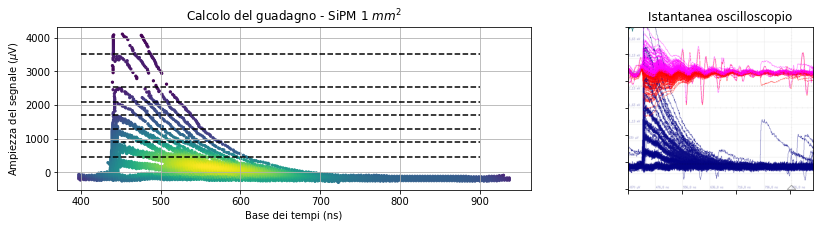

In [13]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN1Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 3), gridspec_kw={'width_ratios': [4, 2]})

tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 1 $mm^2$')

ax[0].scatter(t,v, c = z, s = 5)
ax[0].grid(which='both')

levels_1mm = [450, 900, 1300, 1700, 2100, 2550, 3520]

for l in levels_1mm:
  ax[0].hlines(l, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")
plt.savefig(f"{OUTPUTDIR}/SiPM_1mm_gain_staircase.pdf")

### SiPM $3$ $mm^2$

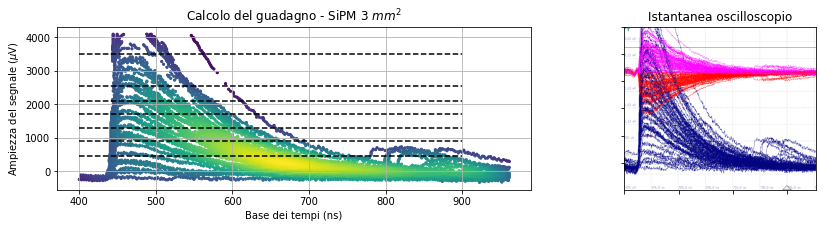

In [14]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN3Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_3mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 3), gridspec_kw={'width_ratios': [4, 2]})
tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 3 $mm^2$')

ax[0].scatter(t,v, c = z, s = 5)
ax[0].grid(which='both')

levels_3mm = [450, 900, 1300, 1700, 2100, 2550, 3520]

for l in levels_3mm:
  ax[0].hlines(l, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")
plt.savefig(f"{OUTPUTDIR}/SiPM_3mm_gain_staircase.pdf")

### SiPM $1$ $mm^2$ - Costante di tempo

Tempo caratteristico τ =  90  ns



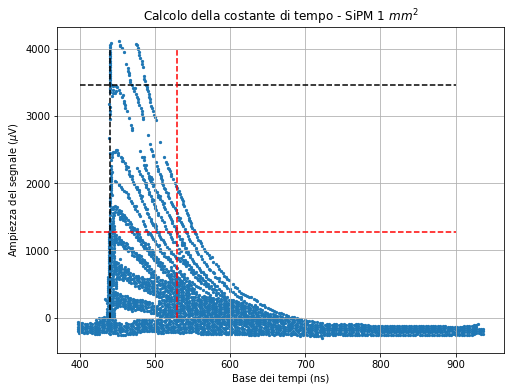

In [ ]:
SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
tv = np.vstack([t,v])
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo della costante di tempo - SiPM 1 $mm^2$')

ax.scatter(t,v,s = 5)
ax.grid(which='both')

maxL = 3460
tauL = maxL / np.exp(1)
tau0 = 440
tauV = 530

ax.hlines(maxL, 400, 900, linestyles="--", color = "black")
ax.hlines(tauL, 400, 900, linestyles="--", color = "red")
ax.vlines(tau0, 0,  4000, linestyles="--", color = "black")
ax.vlines(tauV, 0,  4000, linestyles="--", color = "red")

tau = tauV - tau0
print("Tempo caratteristico τ = ", tau, " ns\n")
plt.savefig(f"{OUTPUTDIR}/SiPM_1mm_tau.pdf")

### SiPM $3$ $mm^2$ - Costante di tempo

Tempo caratteristico τ =  120  ns



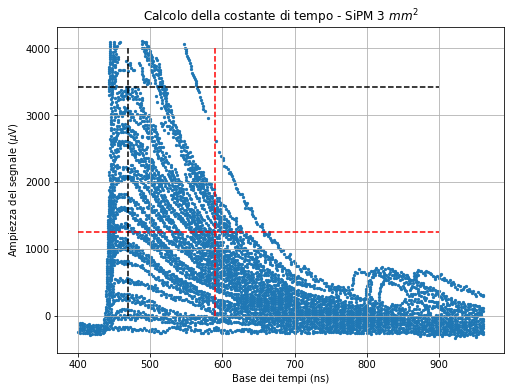

In [ ]:
SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_3mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
tv = np.vstack([t,v])
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo della costante di tempo - SiPM 3 $mm^2$')

ax.scatter(t,v,s = 5)
ax.grid(which='both')

maxL = 3420
tauL = maxL / np.exp(1)
tau0 = 470
tauV = 590

ax.hlines(maxL, 400, 900, linestyles="--", color = "black")
ax.hlines(tauL, 400, 900, linestyles="--", color = "red")
ax.vlines(tau0, 0,  4000, linestyles="--", color = "black")
ax.vlines(tauV, 0,  4000, linestyles="--", color = "red")

tau = tauV - tau0
print("Tempo caratteristico τ = ", tau, " ns\n")
plt.savefig(f"{OUTPUTDIR}/SiPM_3mm_tau.pdf")

### Saturazione SiPM $1$ $mm^2$

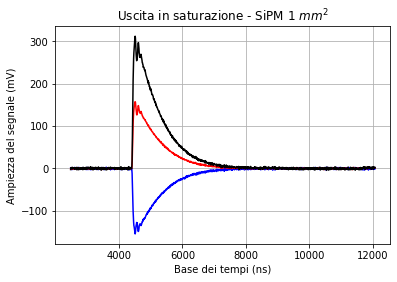

In [10]:
SiPM_1mm_sat = pd.read_csv(f'{DATADIR}/11-10-21/SAT1MM.CSV')
t  = SiPM_1mm_sat['in s'].to_numpy()
C1 = SiPM_1mm_sat['C1 in V'].to_numpy()
C2 = SiPM_1mm_sat['C2 in V'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(t * 10e9, C1 * 1000, color = "blue")
ax.plot(t * 10e9, C2 * 1000, color = "red")
ax.plot(t * 10e9, (C2 - C1) * 1000, color = "black")
ax.grid()

ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (mV)',
       title='Uscita in saturazione - SiPM 1 $mm^2$')

plt.savefig(f"{OUTPUTDIR}/SiPM_sat_1mm.pdf")

### Saturazione SiPM $3$ $mm^2$

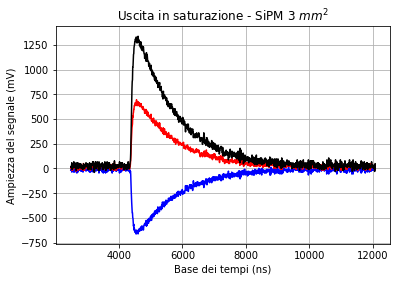

In [11]:
SiPM_3mm_sat = pd.read_csv(f'{DATADIR}/11-10-21/SAT3MM.CSV')
t  = SiPM_3mm_sat['in s'].to_numpy()
C1 = SiPM_3mm_sat['C1 in V'].to_numpy()
C2 = SiPM_3mm_sat['C2 in V'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(t * 10e9, C1 * 1000, color = "blue")
ax.plot(t * 10e9, C2 * 1000, color = "red")
ax.plot(t * 10e9, (C2 - C1) * 1000, color = "black")
ax.grid()

ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (mV)',
       title='Uscita in saturazione - SiPM 3 $mm^2$')

plt.savefig(f"{OUTPUTDIR}/SiPM_sat_3mm.pdf")

## Analisi quantitativa del guadagno

In [ ]:
#To do...

## Commit changes

In [15]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 

/content/Electronics-2021-UNITO
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/valeriopagliarino/Electronics-2021-UNITO
   5b04533..07b4fbd  main       -> origin/main
Updating 5b04533..07b4fbd
Fast-forward
 lab-reports/analog.tex | 31 +++++++++++++++++++++++++++++--
 1 file changed, 29 insertions(+), 2 deletions(-)
[main 79327d2] Plots from data analysis
 2 files changed, 0 insertions(+), 0 deletions(-)
 rewrite analysis/output/SiPM_1mm_gain_staircase.pdf (86%)
 rewrite analysis/output/SiPM_3mm_gain_staircase.pdf (90%)
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 209.87 KiB | 17.49 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local o